In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 27 22:15:13 2022

@author: rodrigo
"""

#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import os
import sys  

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.network_fitness as netfit
importlib.reload(netfit)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)



from geneticalgorithm import geneticalgorithm as ga

import itertools as it

#read_global_variables

plt.style.use("ggplot")


fn = "linz_with_init_net_exp_2.txt"
setup = me.readConfigFile(fn)


#cargamos imagenes en luminance e importance
ilumina = setup["folder_input"] + setup["input_ntli"]
niveles = setup["folder_input"] + setup["input_evm"]
sigma_y = setup['filterg_sy']
sigma_x = setup['filterg_sx']
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
path2output_semivars = (cfg.experiment 
          + setup["experiment_id"]
          + setup["folder_semivariances"]
          + setup["output_semivariances"] 
                       )


filesv = path2output_semivars + ".csv"
filesvmask = path2output_semivars + "mask.csv"

path2optimum_values_file = (cfg.experiment 
                           + setup["experiment_id"] 
                           + setup["folder_output"] 
                           )

saveOptimumValuesTofile = (path2optimum_values_file
                           + setup["output_values"]
                          )

saveArgsTofile = (path2optimum_values_file
                  + setup["output_args"]
                 )

data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])


#NLTI: luminance
#luminance = ps.readIMG(cfg.data + ilumina)

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]

#NTLI: luminance
NTLI = ps.readIMG(ilumina)

from PIL import Image

**Leyendo archivo de configuración del experimento**

In [21]:
fn = "linz_with_init_net_exp_2.txt"



**This function creates the following experiment structure where the semivariance maps and results are saved**
```
linz_experiment_with_initial_positions_no2/
├── linz_with_init_net_exp_2.txt
├── results
└── semivariances
    ├── semivariance050512022.csv
    └── semivariance050512022mask.csv
```

In [22]:
setup = me.readConfigFile(fn)
for key in iter(setup):
    print(str(key)+":" ,setup[str(key)])

experiment_id: linz_experiment_with_initial_positions_no2/
folder_input: locations/linz/
folder_semivariances: semivariances/
folder_output: results/
input_ntli: world_atlas_linzn
input_evm: linz_prioridades
output_semivariances: semivariance050512022
output_values: optimum_values.csv
output_args: optimum_arguments.csv
desaturation_th: -1
neglect_values: -1
tolerance_distance: 0.5
tolerance_angle: 15
filterg_sx: 0.5
filterg_sy: 0.5
gaussian_mode: constant
init_fixed_net: [[39, 22], [35, 29], [34, 31], [34, 34], [36, 39]]
nsensors: [0, 1, 2, 3, 4, 5]
sensitivity_c: [1, 10, 20, 30, 40]
flatness_means_decrease: True
ga_params: {'max_num_iteration': 100, 'population_size': 2000, 'mutation_probability': 0.1, 'elit_ratio': 0.1, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': 500}


In [23]:
#cargamos imagenes en luminance e importance


img1 = cfg.data + setup["folder_input"] + setup["input_ntli"]
img2 = cfg.data + setup["folder_input"] + setup["input_evm"]

NTLI = np.array(Image.open(img1))
FDNTLI = sp.ndimage.gaussian_filter(NTLI, sigma, mode = setup['gaussian_mode'])

EAM = ps.readIMG(img2, invert = True)

c = 1

In [24]:
data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)

In [25]:
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])

In [26]:
variograms = variogram_set.reshape(len(variogram_set),NTLI.shape[0],NTLI.shape[1])
variograms_m = variogram_set_m.reshape(len(variogram_set),NTLI.shape[0],NTLI.shape[1])

In [27]:
EAM = EAM/np.max(EAM)

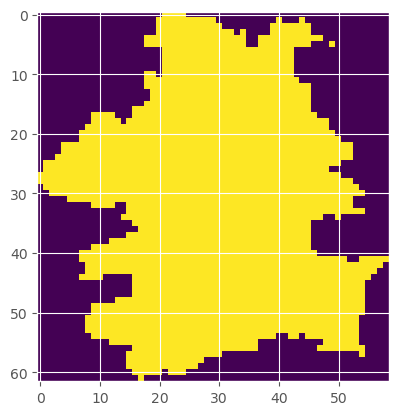

In [28]:
plt.imshow(EAM==1)

In [29]:
coords = ps.get_coords(EAM==1)

In [30]:
allc = setup["sensitivity_c"]

alls = setup["nsensors"]

In [31]:
n_sensors = len(setup['init_fixed_net'])
network = setup['init_fixed_net']

network = np.array(network).flatten()

In [32]:
r = 3 
varbound = np.array([[0, NTLI.shape[0]], [0, NTLI.shape[1]]]*n_sensors)



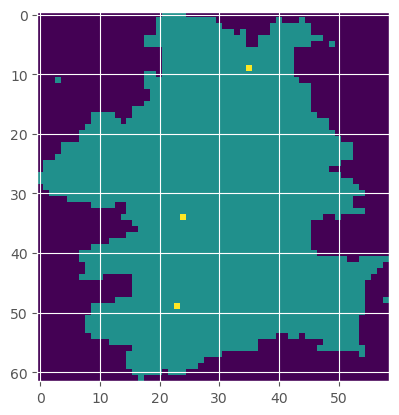

In [33]:
q_p = np.array([np.random.randint(ub[1]) for ub in varbound])
A = np.zeros(NTLI.shape)
positions = q_p.reshape(-1,2)
A[positions[:,0], positions[:,1]] = 1
plt.imshow(A+EAM)

In [34]:
q_p

array([ 9, 35, 49, 23, 11,  3, 48, 58, 34, 24])

Text(0.5, 1.0, '784.4693474955857 4.737312316894531')

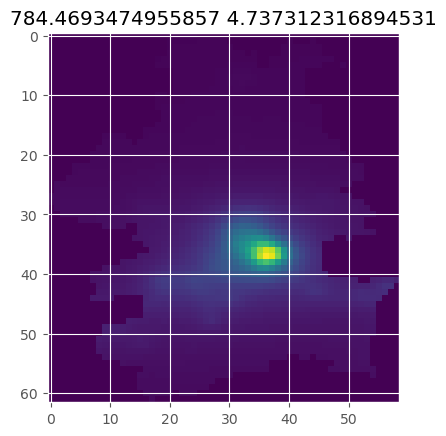

In [35]:
plt.imshow(FDNTLI*EAM)
FDNTLI_bounded = FDNTLI*EAM
FDNTLI_bounded_max = np.max(FDNTLI_bounded)
plt.title(str(np.sum(FDNTLI_bounded)) + " " + str(FDNTLI_bounded_max) )




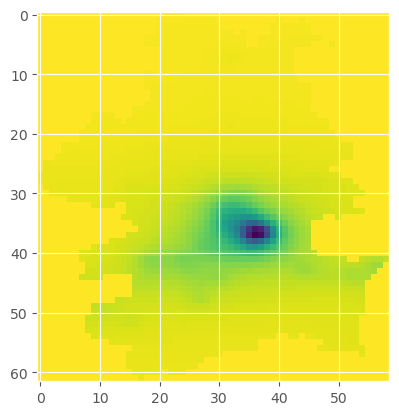

In [36]:
plt.imshow((-FDNTLI_bounded+FDNTLI_bounded_max)/FDNTLI_bounded_max)

In [106]:
positions_flatten = np.array([38, 40, 41,  7,  6, 40, 42, 27, 33, 17])
positions = positions_flatten.reshape(-1,2)

In [120]:
59, 50

aptitude.validate_coordinates(59, 50)

array([], dtype=int64)

1


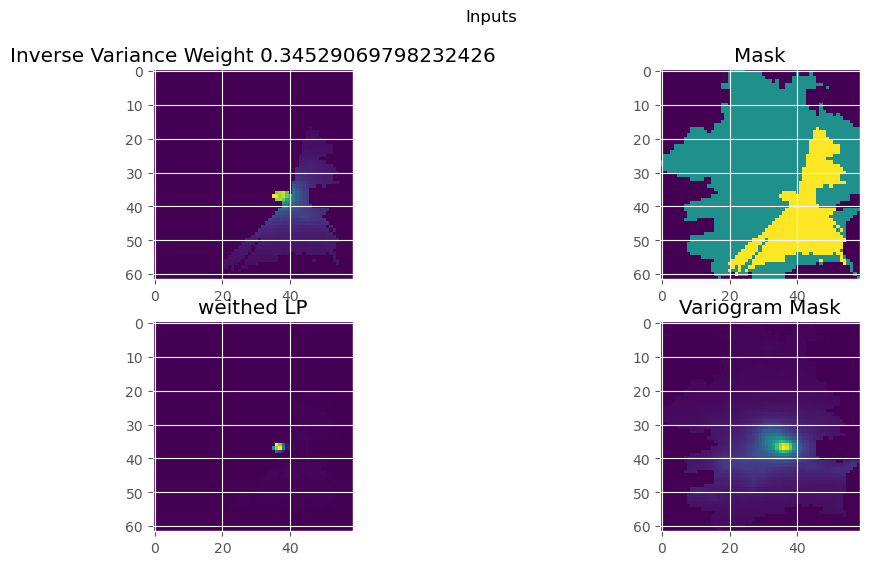

1


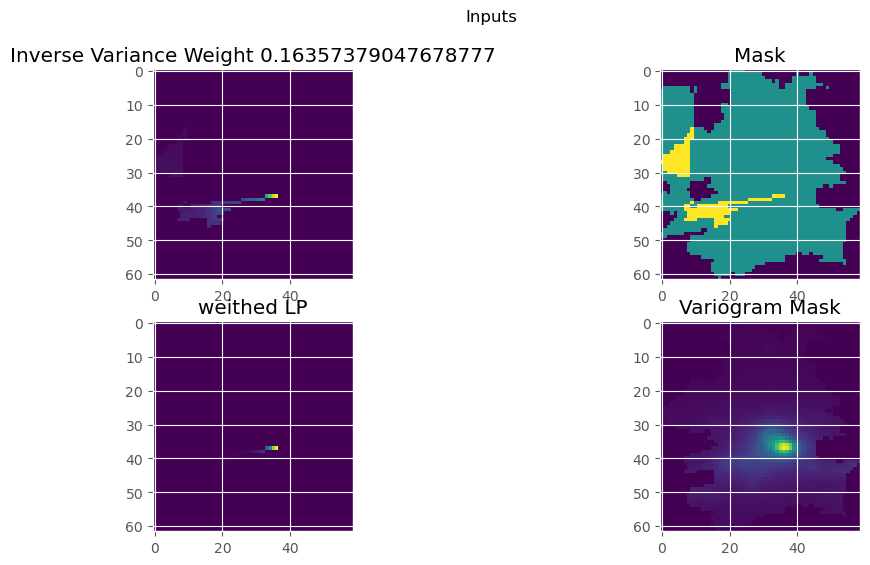

1


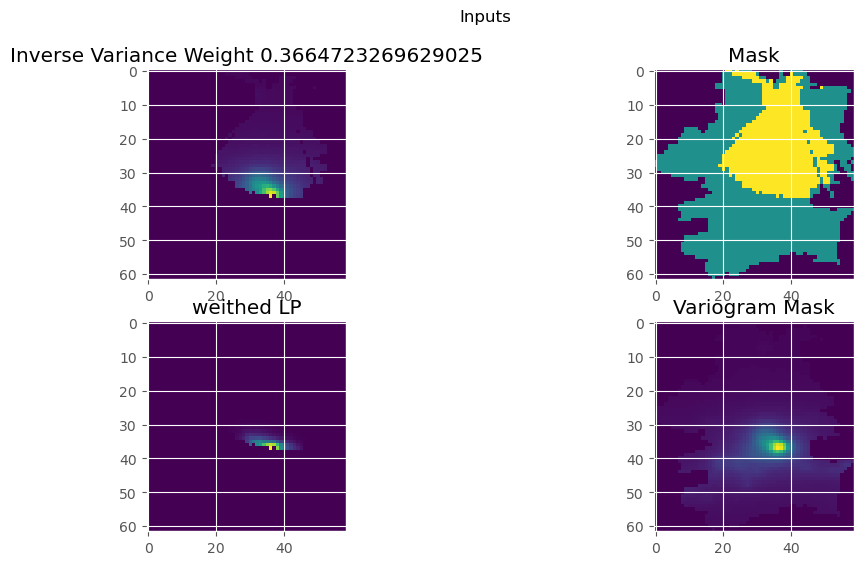

1


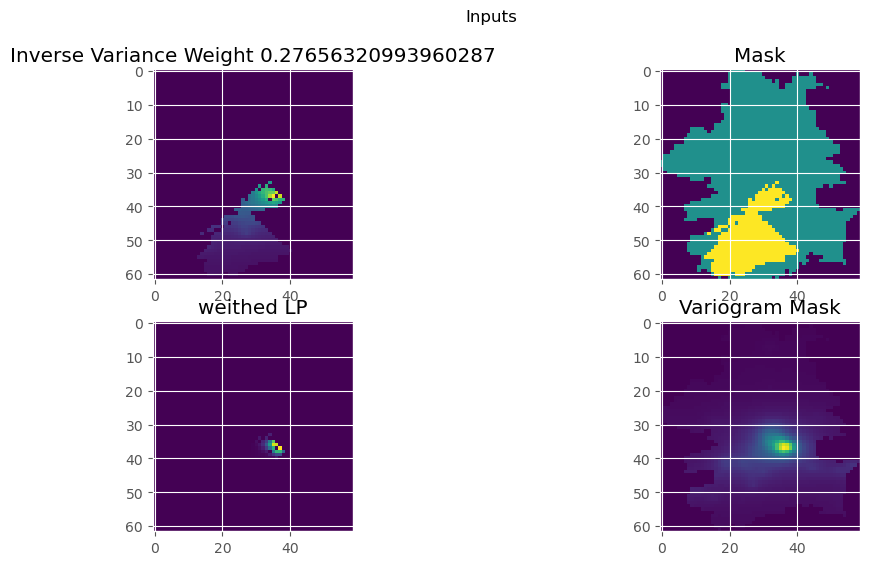

1


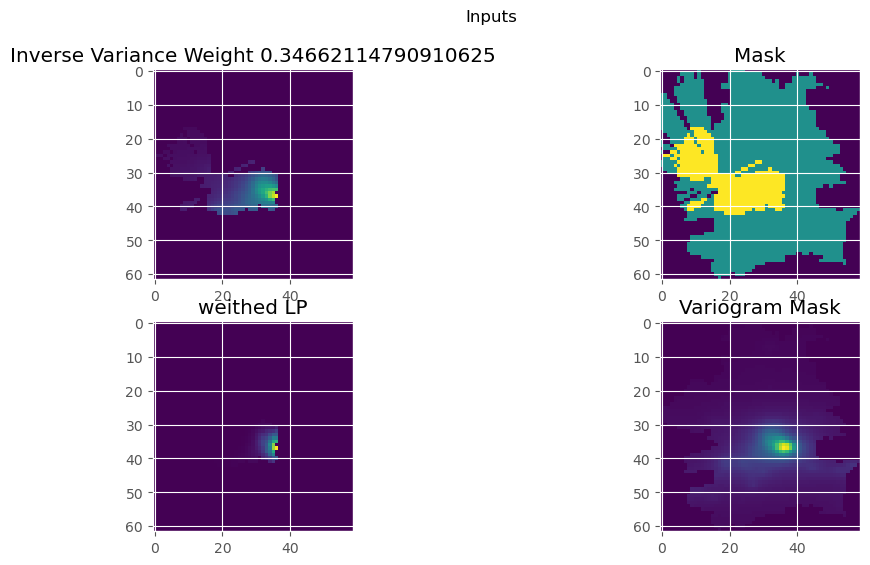

In [118]:


covers = np.zeros((len(positions)+1, FDNTLI.shape[0], FDNTLI.shape[1]))

for i, p in enumerate(positions):
    
    ub = np.max(FDNTLI)**2/2
    ix = aptitude.validate_coordinates(p[0], p[1])
    
    print(len(ix))
    if len(ix)>0:
        
        tvar = aptitude.local_variograms[ix][0]
        tvar_m = aptitude.local_variograms_m[ix][0]
        outofrange = (tvar_m==0)*ub
        inrange = (tvar_m==1)*tvar
        M = inrange + outofrange
        map0to1 = (ub - M)/(ub)
        covers[i+1] = np.copy(map0to1*FDNTLI*EAM)
        
        
    
    
    
        plt.figure(figsize=(6*2, 3*2))
        plt.subplot(221)
        plt.imshow(map0to1*FDNTLI*tvar_m*EAM)
        plt.title("Inverse Variance Weight" + " "+str(np.sum(map0to1*FDNTLI)/np.sum(EAM*FDNTLI)) )

        plt.subplot(222)
        plt.imshow(tvar_m+EAM)
        plt.title("Mask")

        plt.subplot(223)
        plt.imshow(tvar*tvar_m*EAM*FDNTLI)
        plt.title("weithed LP")

        plt.subplot(224)
        plt.imshow(EAM*FDNTLI)
        plt.title("Variogram Mask")

        plt.suptitle('Inputs')
        plt.show()

    
    

In [119]:
str(np.sum(np.max(covers, axis = 0 ))/np.sum(FDNTLI*EAM))

'0.8497361574189465'

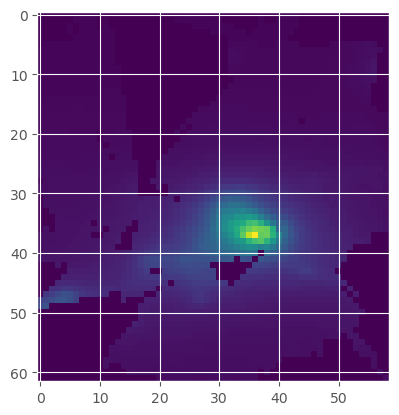

In [114]:
plt.imshow(np.max(covers, axis = 0 ))
plt.title(str(np.max(covers, axis = 0 )))

Text(0.5, 1.0, '0.0')

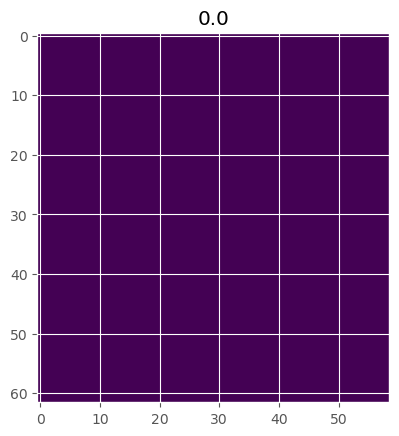

In [38]:
plt.imshow(np.argmax(covers, axis=0)+EAM*0)

LP = np.sum(np.max(covers, axis=0))
PLP = np.sum(FDNTLI)
plt.title(100*LP*PLP)

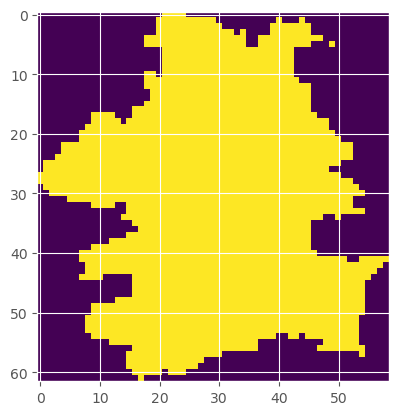

In [39]:
plt.imshow((np.max(covers, axis=0))+EAM*2)

In [92]:
ix_p = 3





inrange = (tvar_m==1)*tvar

map0to1 = (ub - M)/(ub)

NameError: name 'tvar_m' is not defined

In [41]:


plt.imshow(map0to1*FDNTLI)
plt.imshow(tvar*tvar_m*EAM*FDNTLI)
plt.title(np.sum(map0to1*FDNTLI)/np.sum(FDNTLI)*100)

NameError: name 'map0to1' is not defined

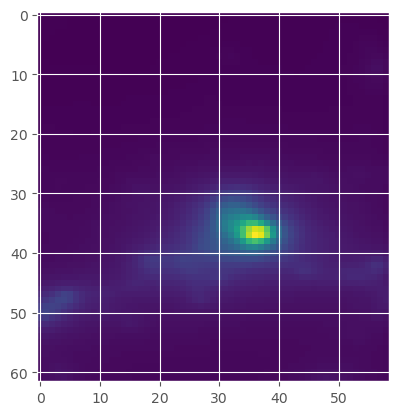

In [216]:
plt.imshow(aptitude.sensitivity)

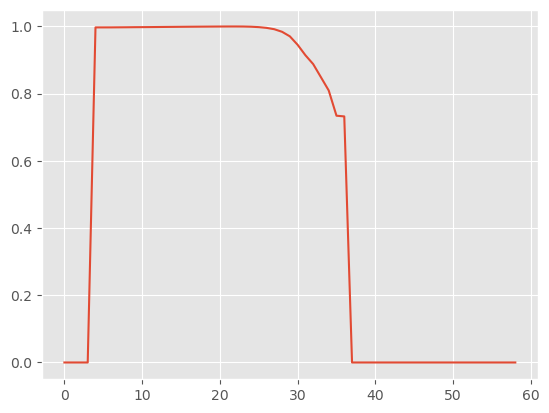

In [207]:
plt.plot(map0to1[34,:])

In [62]:

q_p = np.array([np.random.randint(ub[1]) for ub in varbound])
q = np.copy(network)

print(q)
print(q_p)


[39 22 35 29 34 31 34 34 36 39]
[59 47 52 58 32 15 46 37 43 49]


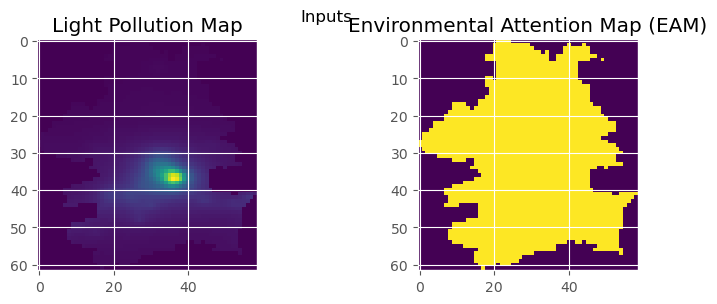

In [63]:
plt.figure(figsize=(9, 3))
plt.subplot(121)
plt.imshow(FDNTLI*EAM)
plt.title("Light Pollution Map")
plt.subplot(122)
plt.imshow(EAM)
plt.title("Environmental Attention Map (EAM)")
plt.suptitle('Inputs')
plt.show()



In [64]:
variogram_set

array([[1.14699792e-04, 2.43382567e-04, 2.58664433e-04, ...,
        6.45792005e-03, 5.23923066e-03, 3.60703487e-03],
       [1.03672953e-04, 2.27410086e-04, 2.12437869e-04, ...,
        6.18819801e-03, 5.49317683e-03, 3.54228933e-03],
       [9.45365944e-05, 2.13961349e-04, 1.99672311e-04, ...,
        6.11436119e-03, 4.93919920e-03, 4.43598145e-03],
       ...,
       [2.90908462e-03, 2.81549150e-03, 2.68731106e-03, ...,
        1.15952986e-03, 8.45178323e-04, 9.20955391e-04],
       [2.84320057e-03, 2.75065846e-03, 2.62391133e-03, ...,
        1.19731045e-03, 8.76930555e-04, 5.08103923e-04],
       [2.56458167e-03, 2.51977150e-03, 2.50212848e-03, ...,
        2.38116738e-03, 2.41643676e-03, 2.23343865e-03]])

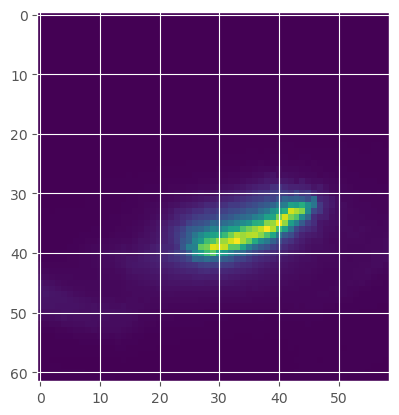

In [65]:
plt.imshow(variograms[0])

In [75]:
import src.network_fitness as netfit
importlib.reload(netfit)

sensitivity = ps.f5(FDNTLI, EAM, 1)
aptitude = netfit.NetworkFitness(FDNTLI,
                                 EAM,
                                 sensitivity,
                                 variograms,
                                 variograms_m,
                                 coords,
                                 network,
                                 1)

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'


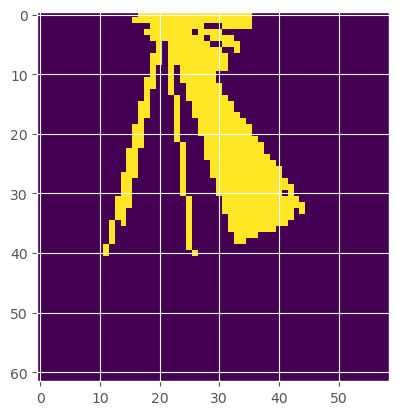

In [76]:
plt.imshow(variograms_m[0])

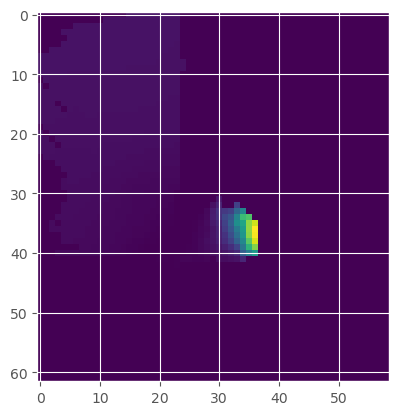

In [77]:
cr = aptitude.validate_coordinates(39, 22)
coordinates = aptitude.coordinates[cr][0]
plt.imshow((aptitude.local_variograms_m[cr][0]*aptitude.local_variograms[cr][0]))

In [78]:
X = np.array([np.random.randint(ub[1]) for ub in varbound])
F = aptitude.J(X)

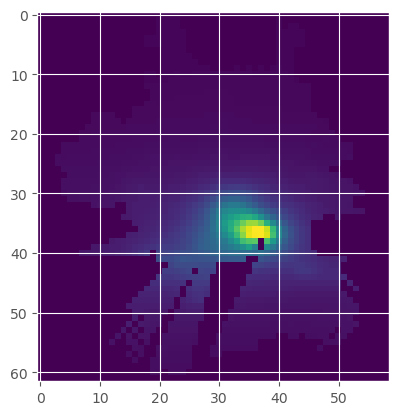

In [79]:
plt.imshow(np.max(aptitude.coverage2(network), axis = 0))

In [80]:
np.max(aptitude.coverage2(network))

3.6441405363440036

 The best solution found:                                                                           
 [26.  1. 37. 36.  6. 24. 53.  2. 24. 25.]

 Objective function:
 -5338.349460729526


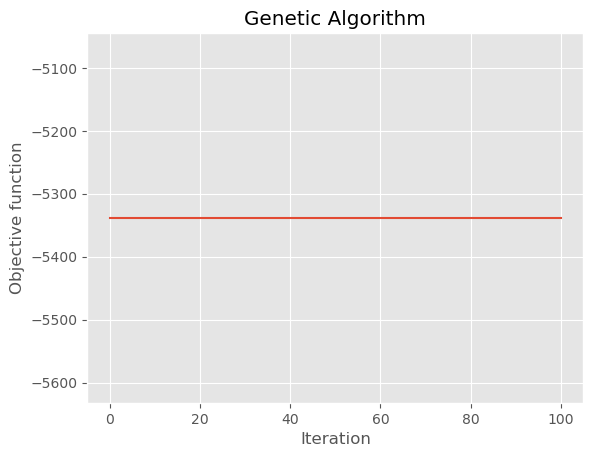

In [81]:
algorithm_parameters = setup["ga_params"]

model = ga(function = aptitude.J,
             dimension = len(varbound),
             algorithm_parameters = algorithm_parameters,
             variable_type = 'int',
             variable_boundaries = varbound,
             convergence_curve = True)

    
    
model.run()

In [82]:
model.output_dict["variable"]

array([26.,  1., 37., 36.,  6., 24., 53.,  2., 24., 25.])

In [83]:
Xr = aptitude.bestComb

In [84]:
Xr

array([39, 22, 37, 36, 34, 31, 34, 34, 36, 39])

In [85]:
network

array([39, 22, 35, 29, 34, 31, 34, 34, 36, 39])

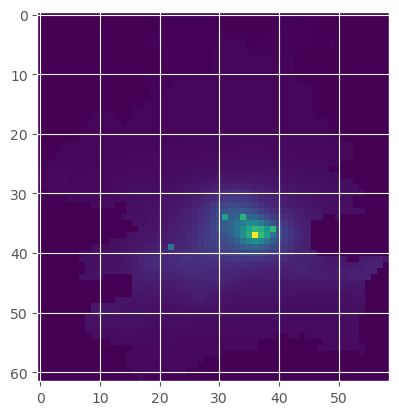

In [91]:
#q_p = np.array([np.random.randint(ub[1]) for ub in varbound])
A = np.zeros(NTLI.shape)

#positions = network.reshape(-1, 2)
#A[positions[:, 0], positions[:, 1]] = 1

positions = Xr.reshape(-1, 2)
A[positions[:, 0], positions[:, 1]] = 2
plt.imshow((A+FDNTLI)*EAM)

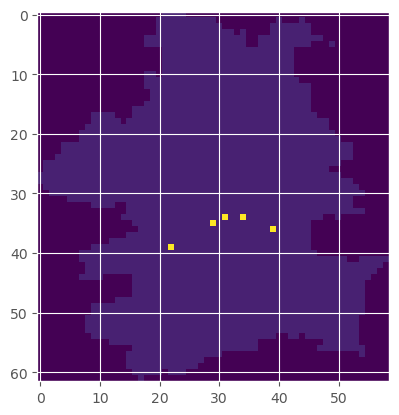

In [74]:
#q_p = np.array([np.random.randint(ub[1]) for ub in varbound])
A = np.zeros(NTLI.shape)

#positions = network.reshape(-1, 2)
#A[positions[:, 0], positions[:, 1]] = 1

positions = network.reshape(-1, 2)
A[positions[:, 0], positions[:, 1]] = 2
plt.imshow(A*5+EAM)

In [47]:
argmax = np.argmax(aptitude.coverage2(network), axis = 0)
plt.imshow(argmax)
plt.title(np.unique(argmax))

AttributeError: module 'src.regionGrowing' has no attribute 'makeSemivarianceMap'

In [77]:
L = aptitude.plotLocations(aptitude.bestComb.reshape(-1,2))
plt.imshow(L)

AttributeError: 'NetworkFitness' object has no attribute 'bestComb'